In [1]:
import os
import torch
import numpy as np
np.random.seed(0)
import random
random.seed(0)
torch.manual_seed(0)
from botorch.test_functions.multi_objective import C2DTLZ2
import tqdm
import pandas as pd

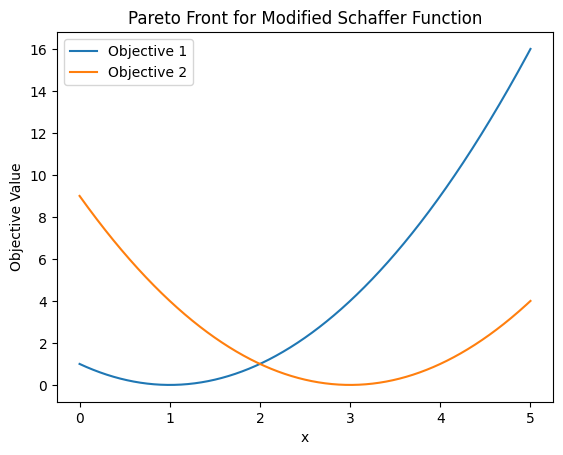

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objectives
def f1(x):
    return (x-1)**2

def f2(x):
    return (x-3)**2

# Generate a range of x values
x_values = np.linspace(0, 5, 1000)

# Calculate the objectives
y_values_f1 = f1(x_values)
y_values_f2 = f2(x_values)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the objectives
ax.plot(x_values, y_values_f1, label='Objective 1')
ax.plot(x_values, y_values_f2, label='Objective 2')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('Objective Value')
ax.set_title('Pareto Front for Modified Schaffer Function')
ax.legend()

# Show the plot
plt.show()


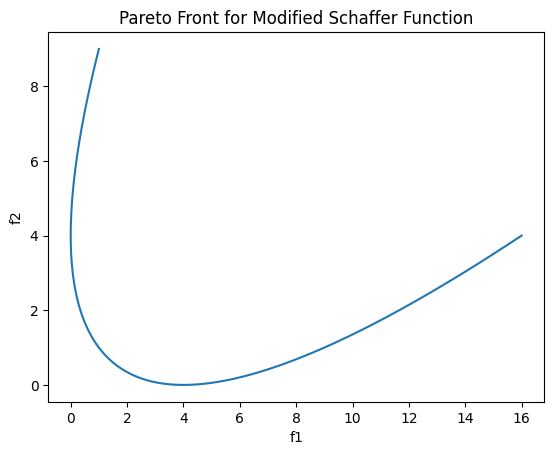

In [5]:
# Calculate the objectives
y_values_f1 = f1(x_values)
y_values_f2 = f2(x_values)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the Pareto front
ax.plot(y_values_f1, y_values_f2)

# Add labels and title
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_title('Pareto Front for Modified Schaffer Function')

# Show the plot
plt.show()

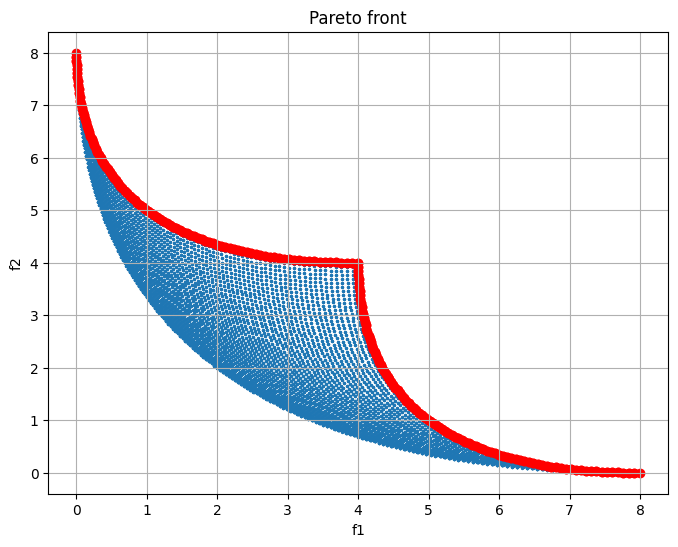

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the functions
def f1(x, y):
    return x**2 + y**2

def f2(x, y):
    return (x-2)**2 + (y-2)**2

def identify_pareto(scores):
    """
    Identify the Pareto-optimal points
    :param scores: An array of scores. Rows are points, columns are objectives.
    :return: A Boolean mask where True indicates Pareto-optimal points.
    """
    is_efficient = np.ones(scores.shape[0], dtype=bool)
    for i, score in enumerate(scores):
        if is_efficient[i]:
            # Remove dominated points
            is_efficient[is_efficient] = np.any(scores[is_efficient] >= score, axis=1)  
            is_efficient[i] = True
    return is_efficient

# Creating a meshgrid
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)

# Evaluating the functions
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Reshaping Z1, Z2 to one-dimensional arrays
Z1_flat = Z1.reshape(-1)
Z2_flat = Z2.reshape(-1)

# Identifying the Pareto front
scores = np.stack([Z1_flat, Z2_flat], axis=1)
pareto_mask = identify_pareto(scores)
Z1_pareto = Z1_flat[pareto_mask]
Z2_pareto = Z2_flat[pareto_mask]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(Z1_flat, Z2_flat, s=2)
plt.scatter(Z1_pareto, Z2_pareto, color='r')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Pareto front')
plt.grid(True)
plt.show()


In [8]:
import torch
import pandas as pd

# Modifying the functions to accept and return torch tensors
def f1(X):
    return (X[:, 0])**2 + (X[:, 1])**2

def f2(X):
    return (X[:, 0]-2)**2 + (X[:, 1]-2)**2

# Number of training points
N = 8

# Create random training inputs within the range [0, 2]
train_X = torch.rand(N, 2) * 2

# Compute the corresponding target values
train_Y1 = f1(train_X)
train_Y2 = f2(train_X)

# Combine the input and target values into a DataFrame
train_data = pd.DataFrame(torch.cat([train_X, train_Y1.unsqueeze(-1), train_Y2.unsqueeze(-1)], dim=1).detach().numpy(),
                          columns=['x1', 'x2', 'f1', 'f2'])

# Export the training data to a csv file
train_data.to_csv('training.csv', index=False)

# Print the training data
print(train_data)


         x1        x2        f1        f2
0  0.277434  0.484470  0.311681  5.264066
1  1.630938  1.586321  5.176373  0.307337
2  0.556505  0.963918  1.238835  3.157145
3  1.639561  1.994133  6.664726  0.129951
4  1.396882  1.135093  3.239716  1.111815
5  1.670486  0.411198  2.959608  2.632872
6  1.186344  0.224694  1.457900  3.813745
7  0.306914  0.483416  0.327888  5.166566
